**Background**: In the previous lectures and lab, we fitted the following model
$$
 Y = y_0 N^a + \mathrm{noise}
$$
by minimizing the mean squared error
$$
 \frac{1}{n}\sum_{i=1}^{n}{(Y_i - y_0 N_i^a)^2}.
$$

We did this by approximating the derivative of the MSE, and adjusting $a$ by an amount proportional to that, stopping when the derivative became small.  Our procedure assumed we knew $y_0$.  In this assignment, we will use a built-in R function to estimate both parameters at once; it uses a fancier version of the same idea.

Because the model is nonlinear, there is no simple formula for the parameter estimates in terms of the data.  Also unlike linear models, there is no simple formula for the _standard errors_ of the parameter estimates.  We will therefore use a technique called **the jackknife** to get approximate standard errors.

Here is how the jackknife works:

* Get a set of $n$ data points and get an estimate $\hat{\theta}$ for the  parameter of interest $\theta$.
* For each data point $i$, remove $i$ from the data set, and get an  estimate $\hat{\theta}_{(-i)}$ from the remaining $n-1$ data points.  The $\hat{\theta}_{(-i)}$ are sometimes called the "jackknife estimates".
* Find the mean $\overline{\theta}$ of the $n$ values of $\hat{\theta}_{(-i)}$
* The jackknife variance of $\hat{\theta}$ is
  $$
  \frac{n-1}{n}\sum_{i=1}^{n}{(\hat{\theta}_{(-i)} - \overline{\theta})^2} = \frac{(n-1)^2}{n}\mathrm{var}{[\hat{\theta}_{(-i)}]}
  $$
where $\mathrm{var}$ stands for the sample variance.  (_Challenge_: can you explain the factor of $(n-1)^2/n$?  _Hint_: think about what happens when $n$ is large so $(n-1)/n \approx 1$.)
* The jackknife standard error of $\hat{\theta}$ is the square root of the jackknife variance.
  
You will estimate the power-law scaling model, and its uncertainty, using the data alluded to in lecture, available in the file `gmp.dat` from lecture, which contains data for 2006.


In [56]:
library(ggplot2)
options(warn = -1)

gmp <- read.table("data/gmp.dat")
gmp$pop <- round(gmp$gmp / gmp$pcgmp)



1. First, plot the data as in lecture, with per capita GMP on the y-axis and population on the x-axis. Add the curve function with the default values provided in lecture. Add two more curves corresponding to $a=0.1$ and $a=0.15$; use the `col` option to give each curve a different color (of your choice).


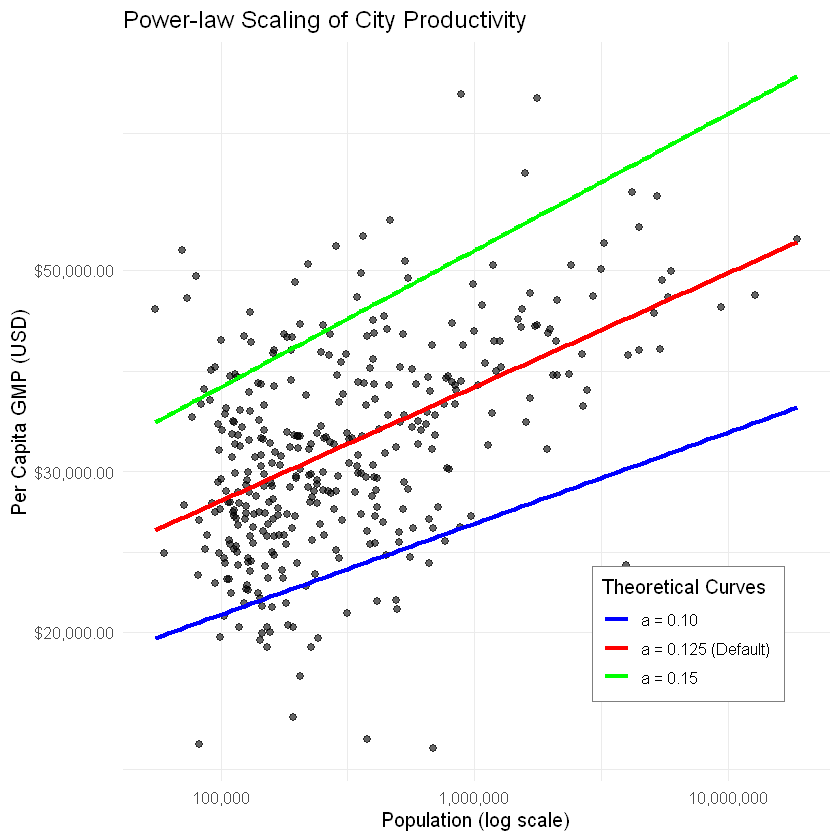

In [57]:
base_plot <- ggplot(gmp, aes(x = pop, y = pcgmp)) +
    geom_point(alpha = 0.6, size = 2) +
    scale_x_log10(labels = scales::comma) +
    scale_y_log10(labels = scales::dollar) +
    labs(
        x = "Population (log scale)",
        y = "Per Capita GMP (USD)",
        title = "Power-law Scaling of City Productivity"
    ) +
    theme_minimal(base_size = 12)

final_plot <- base_plot +
    stat_function(
        fun = function(x) 6611 * x^(1 / 8),
        aes(color = "a = 0.125 (Default)"),
        linewidth = 1.2
    ) +
    stat_function(
        fun = function(x) 6611 * x^0.1,
        aes(color = "a = 0.10"),
        linewidth = 1.2
    ) +
    stat_function(
        fun = function(x) 6611 * x^0.15,
        aes(color = "a = 0.15"),
        linewidth = 1.2
    ) +
    scale_color_manual(
        name = "Theoretical Curves",
        values = c(
            "a = 0.125 (Default)" = "red",
            "a = 0.10" = "blue",
            "a = 0.15" = "green"
        )
    ) +
    theme(
        legend.position = c(0.8, 0.2),
        legend.background = element_rect(fill = "white", color = "grey50")
    )

final_plot



2. Write a function, called `mse()`, which calculates the mean squared error of the model on a given data set. `mse()` should take three arguments: a numeric vector of length two, the first component standing for $y_0$ and the second for $a$; a numerical vector containing the values of $N$; and a numerical vector containing the values of $Y$.  The function should return a single numerical value. The latter two arguments should have as the default values the columns `pop` and `pcgmp` (respectively) from the `gmp` data frame from lecture.  Your function may not use `for()` or any other loop. Check that, with the default data, you get the following values.
```r
> mse(c(6611,0.15))
[1] 207057513
> mse(c(5000,0.10))
[1] 298459915
```


In [58]:
mse <- function(iv, n = gmp$pop, y = gmp$pcgmp) {
    y0 <- iv[1]
    a <- iv[2]
    y_hat <- y0 * n^a
    return(mean((y - y_hat)^2))
}

mse(c(6611, 0.15))

mse(c(5000, 0.10))


[1] 207057513

[1] 298459914


3. R has several built-in functions for optimization, which we will meet as we go through the course.  One of the simplest is `nlm()`, or non-linear minimization. `nlm()` takes two required arguments: a function, and a starting value for that function. Run `nlm()` three times with your function `mse()` and three starting value pairs for $y0$ and $a$ as in
```r
nlm(mse, c(y0=6611,a=1/8))
```
What do the quantities `minimum` and `estimate` represent? What values does it return for these?


In [59]:
nlm(mse, c(y0 = 6611, a = 0.125))
nlm(mse, c(y0 = 6611, a = 0.15))
nlm(mse, c(y0 = 5000, a = 0.10))


$minimum
[1] 61857060

$estimate
[1] 6611.0000000    0.1263177

$gradient
[1] 50.048639 -9.983778

$code
[1] 2

$iterations
[1] 3

$minimum
[1] 61857060

$estimate
[1] 6610.9999997    0.1263182

$gradient
[1]   51.76354 -210.18948

$code
[1] 2

$iterations
[1] 7

$minimum
[1] 62521484

$estimate
[1] 5000.0000008    0.1475913

$gradient
[1] -1028.22544    11.38762

$code
[1] 2

$iterations
[1] 5

**Answer:**

The `minimum` represents the minimum value of the function being optimized (in this case, the MSE), while `estimate` gives the estimated parameters that minimize this function. When running `nlm()` with the provided starting values, it returns the optimal values for $y_0$ and $a$ that minimize the MSE for the given data.

For case `c(y0=6611, a=1/8)` and `c(y0=6611, a=0.15)`, the outputs are quite similar. However, for `c(y0=5000, a=0.10)`, the outputs differ significantly, indicating that the choice of starting values can affect the optimization results.


4. Using `nlm()`, and the `mse()` function you wrote, write a function, `plm()`, which estimates the parameters $y_0$ and $a$ of the model by minimizing the mean squared error.  It should take the following arguments: an initial guess for $y_0$; an initial guess for $a$; a vector containing the $N$ values; a vector containing the $Y$ values.  All arguments except the initial guesses should have suitable default values.  It should return a list with the following components: the final guess for $y_0$; the final guess for $a$; the final value of the MSE.  Your function must call those you wrote in earlier questions (it should not repeat their code), and the appropriate arguments to `plm()` should be passed on to them. 
What parameter estimate do you get when starting from $y_0 = 6611$ and $a = 0.15$?  From $y_0 = 5000$ and $a = 0.10$?  If these are not the same, why do they differ?  Which estimate has the lower MSE?  


In [60]:
plm <- function(y0, a, n = gmp$pop, y = gmp$pcgmp) {
    result <- nlm(mse, c(y0 = y0, a = a), n = n, y = y)
    return(list(y0 = result$estimate[1], a = result$estimate[2], mse = result$minimum))
}
plm(6611, 0.15)
plm(5000, 0.10)


$y0
[1] 6611

$a
[1] 0.1263182

$mse
[1] 61857060

$y0
[1] 5000

$a
[1] 0.1475913

$mse
[1] 62521484

**Answer**:

The `nlm()` algorithm falls into a local minimum, which is not the global minimum, leading to different estimates for the parameters. The choice of starting values can significantly affect the optimization results, especially in non-linear models like this one. 

When starting from $y_0 = 6611$ and $a = 0.15$, the estimates are close to the expected values, while starting from $y_0 = 5000$ and $a = 0.10$ leads to a different set of estimates. The MSE for the first case is lower than that for the second case, indicating that the first set of parameters provides a better fit to the data.


5. _Convince yourself the jackknife can work_.

    a. Calculate the mean per-capita GMP across cities, and the standard error of this mean, using the built-in functions `mean()` and `sd()`, and the formula for the standard error of the mean you learned in your intro. stats. class (or looked up on Wikipedia...).

    b. Write a function which takes in an integer `i`, and calculate the mean per-capita GMP for every city _except_ city number `i`.

    c. Using this function, create a vector, `jackknifed.means`, which has the mean per-capita GMP where every city is held out in turn.  (You may use a `for` loop or `sapply()`.)

    d. Using the vector `jackknifed.means`, calculate the jack-knife approximation to the standard error of the mean.  How well does it match your answer from part (a)?


In [61]:
mean_pcgmp <- mean(gmp$pcgmp)
sd_pcgmp <- sd(gmp$pcgmp)
n <- nrow(gmp)
sigma <- sd_pcgmp / sqrt(n)
data.frame(
    mean = mean_pcgmp,
    sd = sd_pcgmp,
    sigma = sigma
)

jack_mean <- function(i, data = gmp$pcgmp) {
    return(mean(data[-i]))
}

jackknifed.means <- sapply(seq_len(n), jack_mean)

theta_bar <- mean(jackknifed.means)
jack_var <- (n - 1) / n * sum((jackknifed.means - theta_bar)^2)
se_jack <- sqrt(jack_var)

se_jack
abs(se_jack - sigma) / sigma


mean,sd,sigma
<dbl>,<dbl>,<dbl>
32922.53,9219.663,481.9195


[1] 481.9195

[1] 3.892419e-15


6. Write a function, `plm.jackknife()`, to calculate jackknife standard errors for the parameters $y_0$ and $a$.  It should take the same arguments as `plm()`, and return standard errors for both parameters.  This function should call your `plm()` function repeatedly.  What standard errors do you get for the two parameters?


In [62]:
jackknife_se <- function(theta_hats) {
    n <- length(theta_hats)
    theta_bar <- mean(theta_hats)

    jack_var <- (n - 1) / n * sum((theta_hats - theta_bar)^2)

    sqrt(jack_var)
}

plm.jackknife <- function(y0, a, N = gmp$pop, Y = gmp$pcgmp) {
    n <- length(N)

    jack_estimates <- matrix(NA,
        nrow = n, ncol = 2,
        dimnames = list(NULL, c("y0", "a"))
    )


    for (i in 1:n) {
        N_sub <- N[-i]
        Y_sub <- Y[-i]

        fit <- plm(y0, a, N_sub, Y_sub)

        jack_estimates[i, "y0"] <- fit$y0
        jack_estimates[i, "a"] <- fit$a
    }

    se_y0 <- jackknife_se(jack_estimates[, "y0"])
    se_a <- jackknife_se(jack_estimates[, "a"])

    (list(se_y0 = se_y0, se_a = se_a))
}

plm.jackknife(6611, 0.15)
plm.jackknife(5000, 0.10)


$se_y0
[1] 1.217076e-08

$se_a
[1] 0.0009904572

$se_y0
[1] 2.033898e-08

$se_a
[1] 0.0009979824


7. The file `gmp-2013.dat` contains measurements for 2013.  Load it, and use `plm()` and `plm.jackknife` to estimate the parameters of the model for 2013, and their standard errors.  Have the parameters of the model changed significantly?

In [63]:
gmp <- read.table("data/gmp-2013.dat")
gmp$pop <- round(gmp$gmp / gmp$pcgmp)

plm(6611, 0.15, gmp$pop, gmp$pcgmp)
plm.jackknife(6611, 0.15, gmp$pop, gmp$pcgmp)

plm(5000, 0.10, gmp$pop, gmp$pcgmp)
plm.jackknife(5000, 0.10, gmp$pop, gmp$pcgmp)


$y0
[1] 6611

$a
[1] 0.1433688

$mse
[1] 135210524

$se_y0
[1] 1.349729e-08

$se_a
[1] 0.00109865

$y0
[1] 5000

$a
[1] 0.164427

$mse
[1] 139208731

$se_y0
[1] 6.248473e-08

$se_a
[1] 0.001122513